In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have a CSV file with two columns: "Month" and "Passengers"
# Modify the file path accordingly
file_path = r'C:\Users\a21ma\OneDrive\Desktop\Sem 6 Codes\TSA\Experiment 1\AirPassengers.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [199]:

# Convert the "Month" column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [200]:
df = df.set_index(df.Month)
df

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [201]:
df.drop('Month', axis = 1, inplace = True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [202]:
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Text(0.5, 1.0, 'Trend of the Time Series')

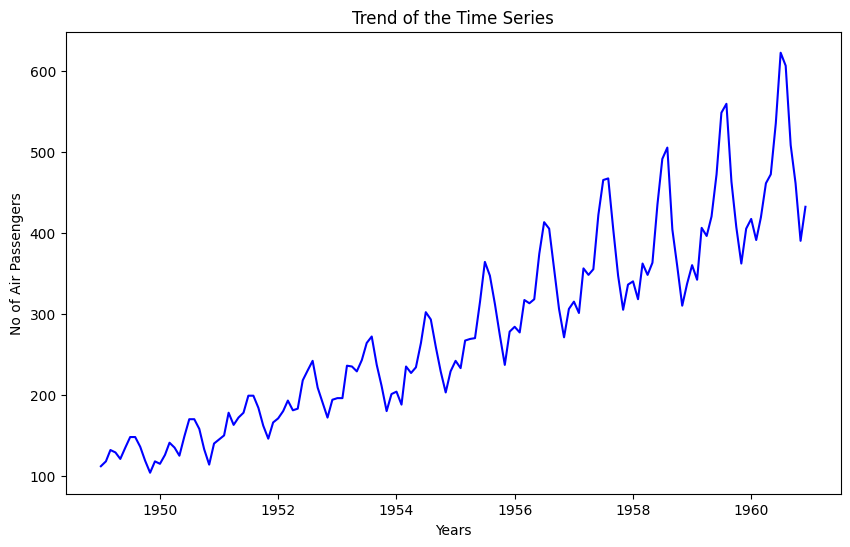

In [203]:
plt.figure(figsize= (10,6))
plt.plot(df, color="blue")
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')

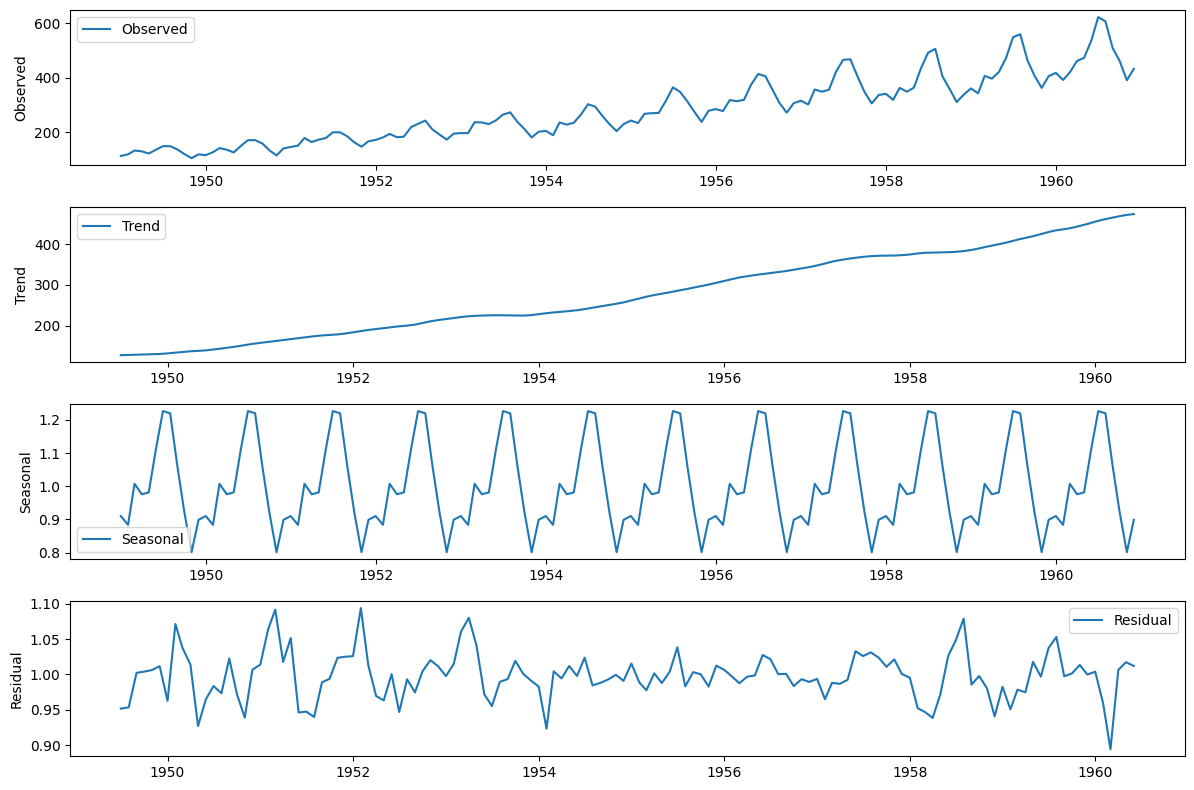

In [204]:
# Time series decomposition (trend, seasonal, residual)
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend()
plt.ylabel('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.ylabel('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.ylabel('Residual')

plt.tight_layout()
plt.show()

In [205]:
# Set a random seed for reproducibility
np.random.seed(42)

# Define the percentage of rows to drop (adjust as needed)
percentage_to_drop = 0.1  # 10% of rows will be dropped

# Calculate the number of rows to drop
num_rows_to_drop = int(percentage_to_drop * len(df))

# Randomly select rows to drop
rows_to_drop = np.random.choice(df.index, size=num_rows_to_drop, replace=False)

# Drop the selected rows
df_dropped = df.drop(rows_to_drop)

# Add random outliers
num_outliers = 20  # Choose the number of outliers
outlier_indices = np.random.choice(df_dropped.index, size=num_outliers, replace=False)
df_dropped.loc[outlier_indices, 'Passengers'] += np.random.normal(loc=100, scale=50, size=num_outliers)


df_dropped

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


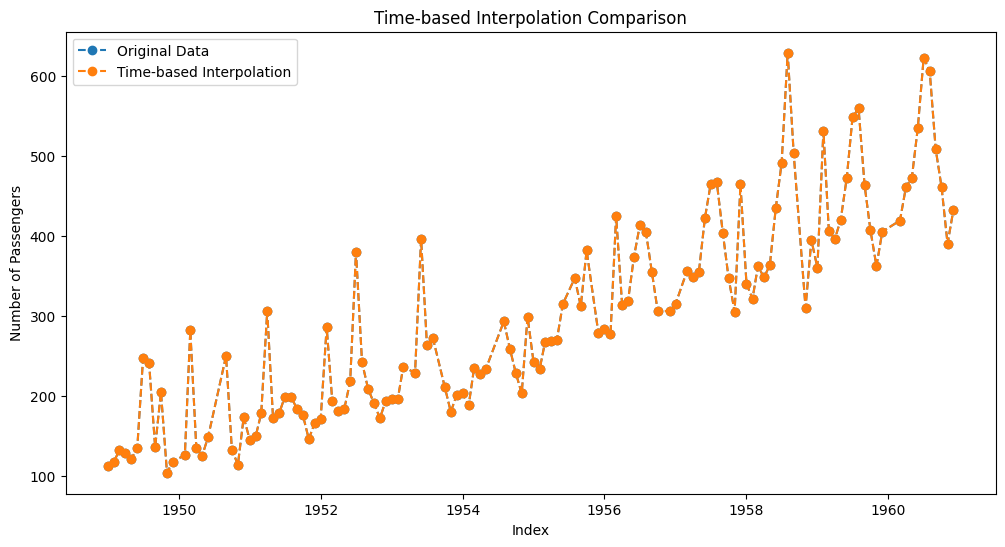

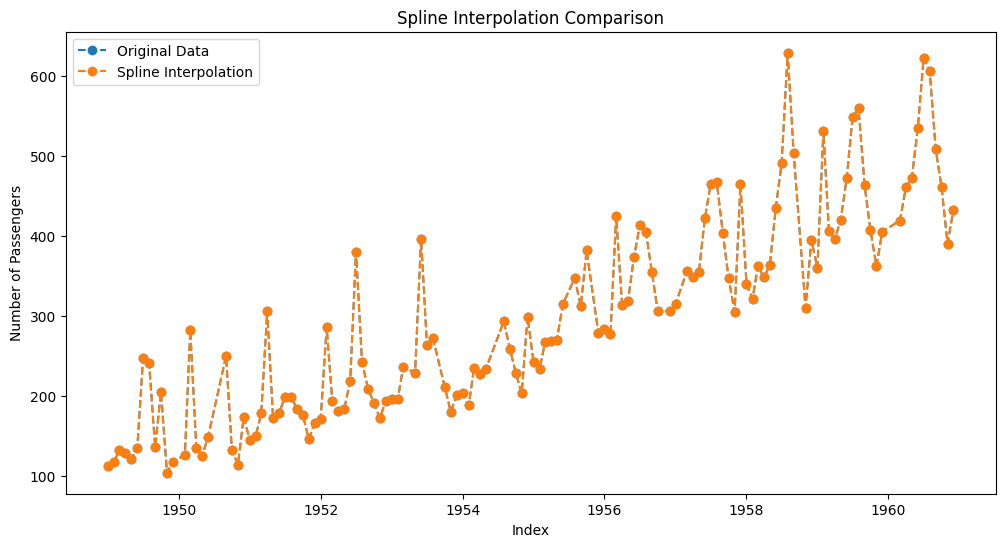

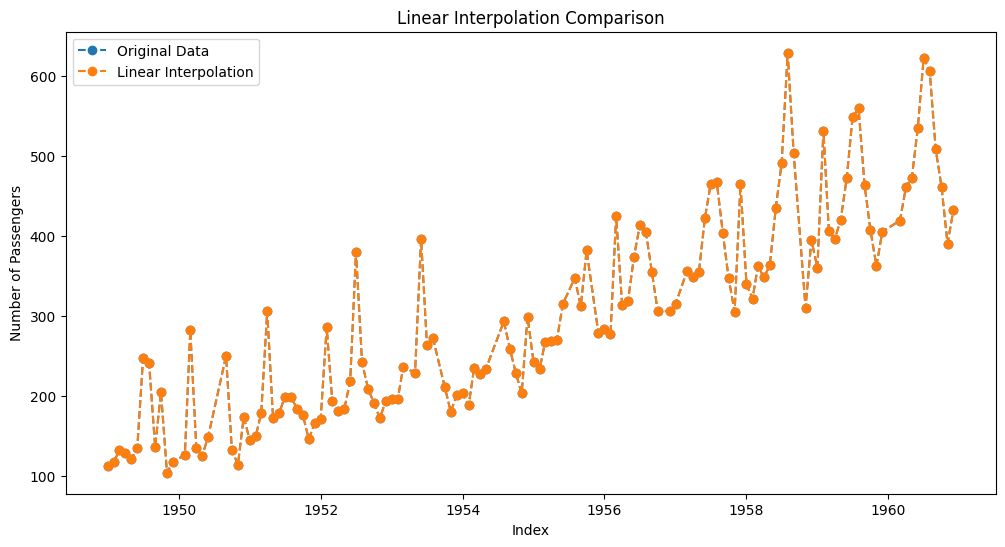

In [206]:
# Perform time-based interpolation
df_time_based = df_dropped.interpolate(method='time')

# Perform spline interpolation
df_spline = df_dropped.interpolate(method='spline', order=2)

# Perform linear interpolation
df_linear = df_dropped.interpolate(method='linear')

# Plot the results for Time-based Interpolation
plt.figure(figsize=(12, 6))
plt.plot(df_dropped['Passengers'], label='Original Data', linestyle='--', marker='o')
plt.plot(df_time_based['Passengers'], label='Time-based Interpolation', linestyle='--', marker='o')
plt.title('Time-based Interpolation Comparison')
plt.xlabel('Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Plot the results for Spline Interpolation
plt.figure(figsize=(12, 6))
plt.plot(df_dropped['Passengers'], label='Original Data', linestyle='--', marker='o')
plt.plot(df_spline['Passengers'], label='Spline Interpolation', linestyle='--', marker='o')
plt.title('Spline Interpolation Comparison')
plt.xlabel('Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Plot the results for Linear Interpolation
plt.figure(figsize=(12, 6))
plt.plot(df_dropped['Passengers'], label='Original Data', linestyle='--', marker='o')
plt.plot(df_linear['Passengers'], label='Linear Interpolation', linestyle='--', marker='o')
plt.title('Linear Interpolation Comparison')
plt.xlabel('Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

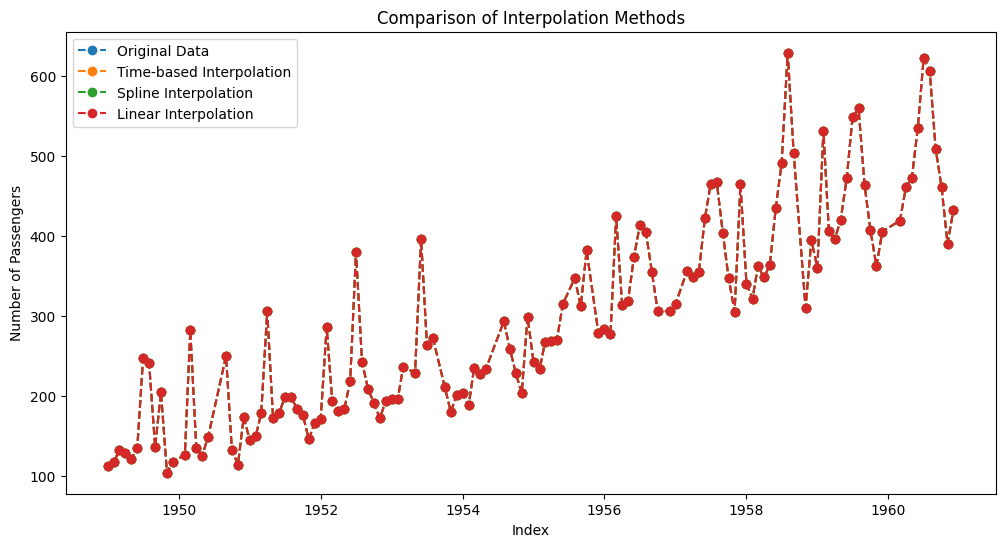

In [207]:
# Plot the results for all interpolations in a single graph
plt.figure(figsize=(12, 6))
plt.plot(df_dropped['Passengers'], label='Original Data', linestyle='--', marker='o')
plt.plot(df_time_based['Passengers'], label='Time-based Interpolation', linestyle='--', marker='o')
plt.plot(df_spline['Passengers'], label='Spline Interpolation', linestyle='--', marker='o')
plt.plot(df_linear['Passengers'], label='Linear Interpolation', linestyle='--', marker='o')

plt.title('Comparison of Interpolation Methods')
plt.xlabel('Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

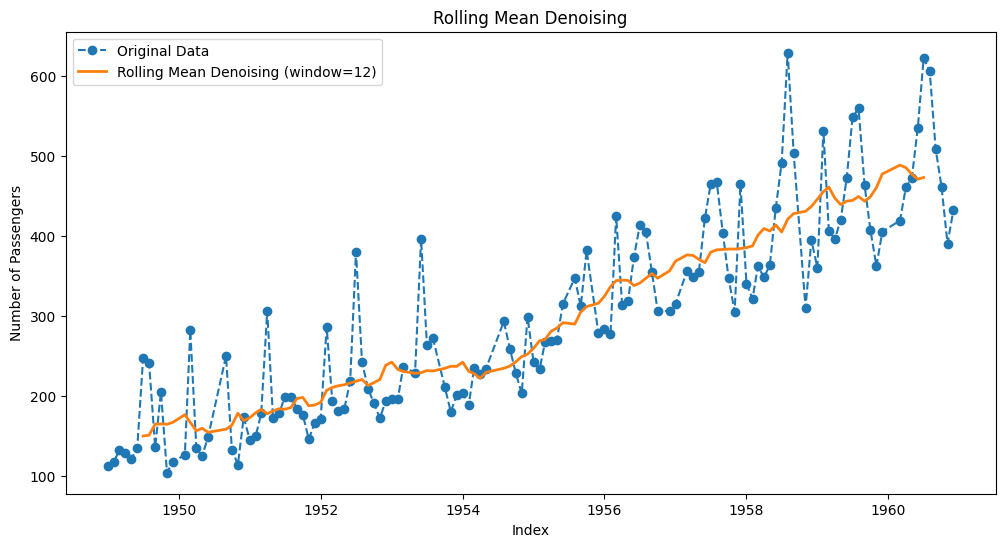

In [208]:
# Apply rolling means denoising
window_size = 12  # Choose an appropriate window size
df_rolling_mean = df_dropped['Passengers'].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_dropped['Passengers'], label='Original Data', linestyle='--', marker='o')
plt.plot(df_rolling_mean, label=f'Rolling Mean Denoising (window={window_size})', linestyle='-', linewidth=2)

plt.title('Rolling Mean Denoising')
plt.xlabel('Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

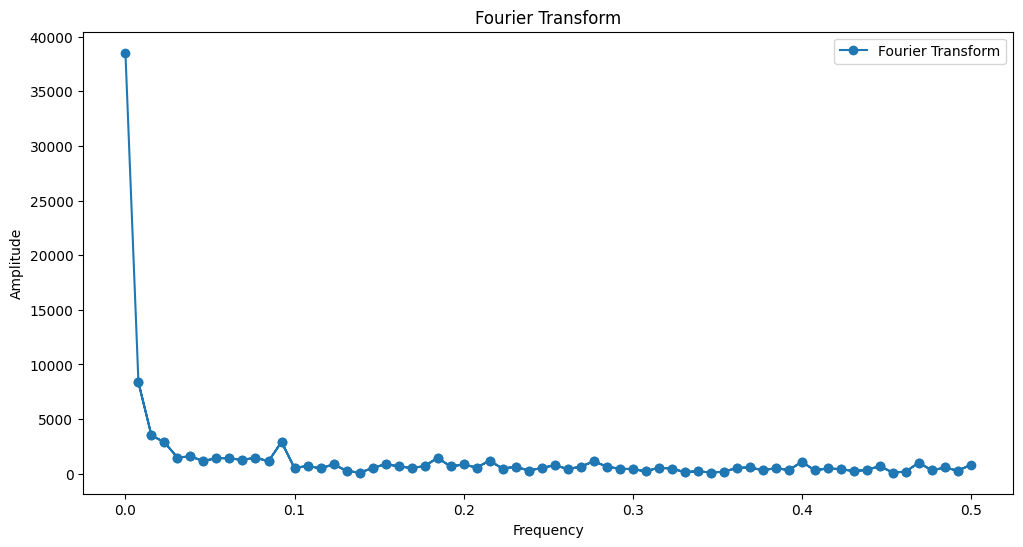

In [209]:
# Apply Fourier Transform
# Assuming a regular time interval, you may need to adjust if your data has irregular intervals
fft_result = np.fft.fft(df_dropped['Passengers'])
frequencies = np.fft.fftfreq(len(fft_result))

# Plot the results for Fourier Transform
plt.figure(figsize=(12, 6))
plt.plot(np.abs(frequencies), np.abs(fft_result), label='Fourier Transform', linestyle='-', marker='o')

plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


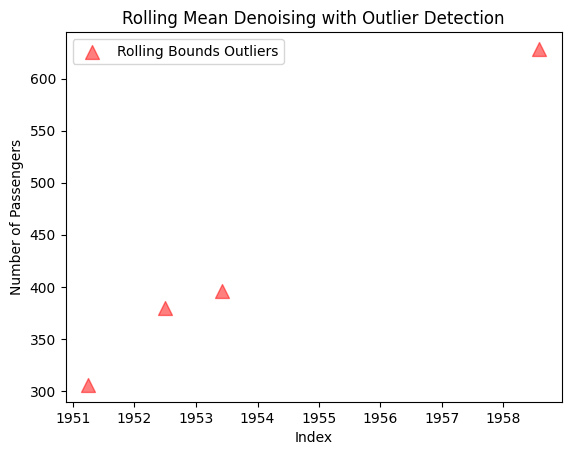

In [210]:
# Rolling statistical bounds for outlier detection
rolling_std = df_dropped['Passengers'].rolling(window=window_size, center=True).std()

lower_bound = df_rolling_mean - 2 * rolling_std
upper_bound = df_rolling_mean + 2 * rolling_std

# Identify outliers using rolling statistical bounds
rolling_bounds_outliers = (df_dropped['Passengers'] < lower_bound) | (df_dropped['Passengers'] > upper_bound)

# Mark rolling statistical bounds outliers as red triangles
plt.scatter(df_dropped.index[rolling_bounds_outliers],
            df_dropped['Passengers'][rolling_bounds_outliers],
            color='red', marker='^', label='Rolling Bounds Outliers', s=100, alpha=0.5)

plt.title('Rolling Mean Denoising with Outlier Detection')
plt.xlabel('Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

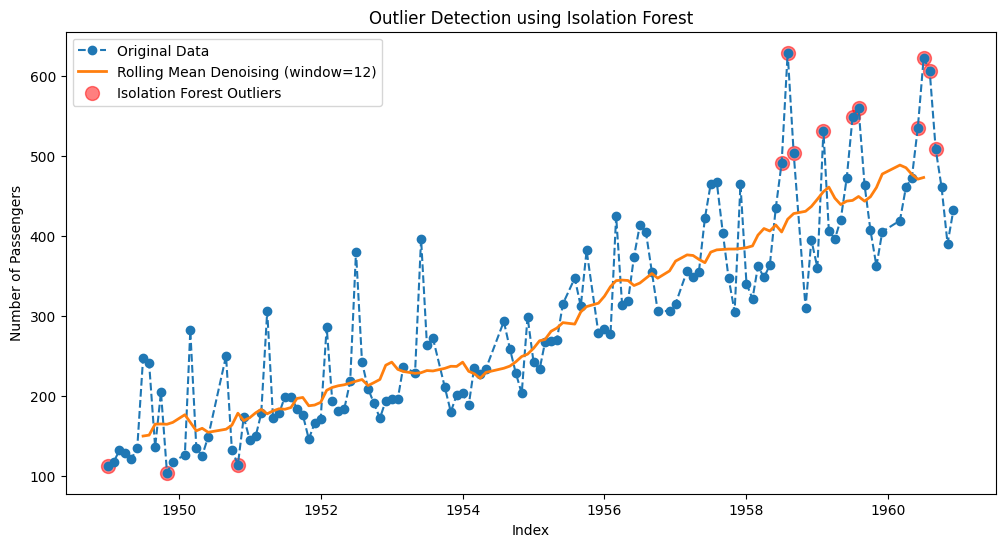

In [211]:
# Isolation Forest for outlier detection
X = df_dropped[['Passengers']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf_isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df_dropped['IsolationForest_Outliers'] = clf_isolation_forest.fit_predict(X_scaled)

# Identify Isolation Forest outliers
isolation_forest_outliers = df_dropped['IsolationForest_Outliers'] == -1

# Plot the results for outlier detection using Isolation Forest
plt.figure(figsize=(12, 6))
plt.plot(df_dropped['Passengers'], label='Original Data', linestyle='--', marker='o')
plt.plot(df_rolling_mean, label=f'Rolling Mean Denoising (window={window_size})', linestyle='-', linewidth=2)

# Mark Isolation Forest outliers as red dots
plt.scatter(df_dropped.index[isolation_forest_outliers], 
            df_dropped['Passengers'][isolation_forest_outliers],
            color='red', label='Isolation Forest Outliers', s=100, alpha=0.5)

plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

c:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


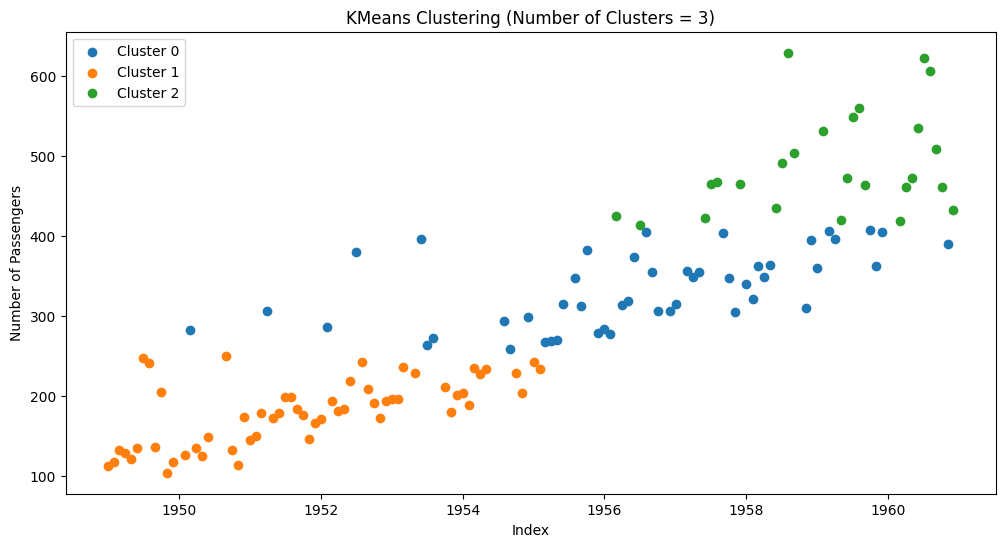

In [212]:
# KMeans clustering
# Using the entire dataset for simplicity, you may choose a subset based on your needs
X = df_dropped[['Passengers']].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (adjust as needed)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_dropped['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the results for KMeans clustering
plt.figure(figsize=(12, 6))
for cluster in range(n_clusters):
    cluster_data = df_dropped[df_dropped['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['Passengers'], label=f'Cluster {cluster}')

plt.title(f'KMeans Clustering (Number of Clusters = {n_clusters})')
plt.xlabel('Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()